# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [1]:
# Import relevant libraries and modules.

### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [3]:
# Display the first ten rows of data.

### YOUR CODE HERE ###
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [4]:
# Display the data type for each column in your DataFrame.

### YOUR CODE HERE ###
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

ZY: From our previous models, we have figured out that Infligh entertainment, ease of online booking and seat comfort were good predictors of satisfaction. I think that for the XGBoost model, it will likely be the same, except that it will find better parameters or points to classify passengers.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

ZY: The standard 4 metrics: accuracy, precision, recall, and f1. f1 will be best as it calculates the harmonic mean between precision and recall.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [5]:
# Convert the object predictor variables to numerical dummies.

### YOUR CODE HERE ###
airline_data = pd.get_dummies(airline_data,drop_first=False)
airline_data.head(10)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0,0,1,0,1,0
5,30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,0,1,1,0,0,1,0,1,0
6,66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0,0,1,1,0,0,1,0,1,0
7,10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,0,1,1,0,0,1,0,1,0
8,56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,0,1,1,0,0,1,1,0,0
9,22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0,0,1,1,0,0,1,0,1,0


### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [6]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = airline_data['satisfaction_satisfied']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = airline_data.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis=1)

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [7]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [8]:
# Define xgb to be your XGBClassifier.

### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, define a range of values for `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

Consider a more limited range for each parameter to allow for timely iteration and model training.

In [9]:
# Define parameters for tuning as `cv_params`.

### YOUR CODE HERE ###
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

**Question:** What is the likely effect of adding more estimators to your GridSearch?

ZY: Computational time will increase with diminishing returns.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [10]:
# Define your criteria as `scoring`.

### YOUR CODE HERE ###
scoring = {'accuracy','precision','recall','f1'}

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [11]:
# Construct your GridSearch.

### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [12]:
%%time
# fit the GridSearch model to training data

### YOUR CODE HERE ###
xgb_cv.fit(X_train,y_train)

CPU times: user 1h 18min 35s, sys: 9.8 s, total: 1h 18min 45s
Wall time: 39min 24s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 

In [13]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [14]:
# Create xgb model results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.941043,0.935008,0.947159,0.935972


In [15]:
print('Best params: ', xgb_cv.best_params_)

Best params:  {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 15, 'subsample': 0.7}


**Question:** Which optimal set of parameters did the GridSearch yield?

ZY: 

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [19]:
# Use `pickle` to save the trained model.

### YOUR CODE HERE ###
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [20]:
# Apply your model to predict on your test data. Call this output "y_pred".

### YOUR CODE HERE ###
y_pred = xgb_cv.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [21]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
accuracy_score = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy_score}")
# 2. Print your precision score.

### YOUR CODE HERE ###
precision_score = precision_score(y_test,y_pred)
print(f"Precision: {precision_score}")
# 3. Print your recall score.

### YOUR CODE HERE ###
recall_score = recall_score(y_test,y_pred)
print(f"Recall: {recall_score}")
# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = f1_score(y_test,y_pred)
print(f"F1: {f1_score}")

Accuracy: 0.9340314136125655
Precision: 0.9465036952814099
Recall: 0.9327170868347339
F1: 0.9395598194130925


**Question:** How should you interpret your accuracy score?

[Write your response here. Double-click (or enter) to edit.]

**Question:** Is your accuracy score alone sufficient to evaluate your model?

[Write your response here. Double-click (or enter) to edit.]

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

[Write your response here. Double-click (or enter) to edit.]

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

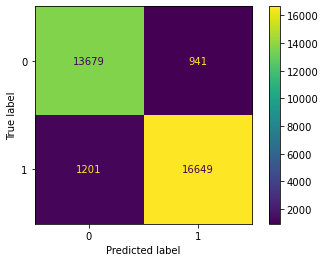

In [24]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###
disp.plot(values_format='')

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

[Write your response here. Double-click (or enter) to edit.]

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

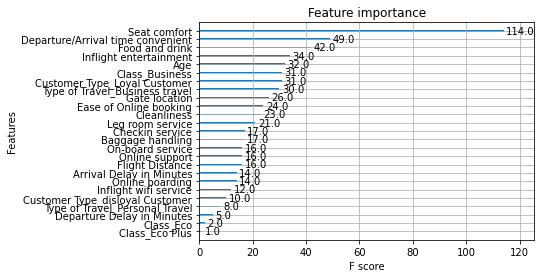

In [25]:
# Plot the relative feature importance of the predictor variables in your model.

### YOUR CODE HERE ###
plot_importance(xgb_cv.best_estimator_)

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

[Write your response here. Double-click (or enter) to edit.]

### Compare models

Create a table of results to compare model performance.

In [27]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945422, 0.947306, f1_score],
                      'Recall': [0.935863, 0.944501, recall_score],
                      'Precision': [0.955197, 0.950128, precision_score],
                      'Accuracy': [0.940864, 0.942450, accuracy_score]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.939560,0.932717,0.946504,0.934031


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

[Write your response here. Double-click (or enter) to edit.]

## Considerations

**What are some key takeaways you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you share your findings with your team?**

[Write your response here. Double-click (or enter) to edit.]

**What would you share with and recommend to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged